In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.cloud import storage

storage_client = storage.Client()

bucket_name = "i535_dhchhed_airbnb"

In [ ]:
from google.cloud import storage

def list_blobs(bucket_name):
    storage_client = storage.Client()

    blobs = storage_client.list_blobs(bucket_name)

    for blob in blobs:
        print(blob.name)

In [ ]:
list_blobs(bucket_name)

airbnb_dataset.csv
airbnb_preprocessed_dataset.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('gs://i535_dhchhed_airbnb/airbnb_dataset.csv')

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# check for missing values
missing_val = df.isnull().sum().sort_values(ascending=False)

# percentage of missing values in entire dataset
missing_val = pd.DataFrame(data = missing_val, columns = ["Count"])
missing_val["Percentage"] = missing_val["Count"].apply(lambda x: "{:.3f}".format(float(x)/df.shape[0]*100))
missing_val

,Count,Percentage
company,112593,94.307
agent,16340,13.686
country,488,0.409
children,4,0.003
reserved_room_type,0,0.000
assigned_room_type,0,0.000
booking_changes,0,0.000
deposit_type,0,0.000
hotel,0,0.000
previous_cancellations,0,0.000


In [ ]:
# dropping the column 'company' because it has a of lot of missing values
df.drop(['company'], axis=1, inplace=True)

In [ ]:
# there is no need of column 'agent' for analysis, hence dropping it
df.drop(['agent'], axis=1, inplace=True)

In [ ]:
# finding numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
print("Total number of numerical features are: ", len(numerical_features))
df[numerical_features].head()
print("Numerical attributes are: ", df[numerical_features].columns.values)
print("\n")

# check for categorical attributes
df_categorical_attributes = df.select_dtypes(include="object")
print("Total number of categorical features are: ", len(df_categorical_attributes.columns.values))
print("Categorical attributes are: ", df_categorical_attributes.columns.values)

Total number of numerical features are:  18
Numerical attributes are:  ['is_canceled' 'lead_time' 'arrival_date_year' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'children' 'babies' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'booking_changes' 'days_in_waiting_list' 'adr'
 'required_car_parking_spaces' 'total_of_special_requests']


Total number of categorical features are:  12
Categorical attributes are:  ['hotel' 'arrival_date_month' 'meal' 'country' 'market_segment'
 'distribution_channel' 'reserved_room_type' 'assigned_room_type'
 'deposit_type' 'customer_type' 'reservation_status'
 'reservation_status_date']


In [ ]:
# check for outliers
for column in df.columns:
  if column == 'hotel' or column == 'arrival_date_month' or column == 'meal' or column == 'country' or column == 'market_segment' or column == 'distribution_channel' or column == 'reserved_room_type' or column == 'assigned_room_type' or column == 'deposit_type' or column == 'customer_type' or column == 'reservation_status' or column == 'reservation_status_date':
    continue
  total_outliers = df.shape[0]
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3 - q1
  lower_bound = q1 - 1.5*IQR
  upper_bound = q3 + 1.5*IQR

  total_outliers = total_outliers - df.shape[0]
  print("The number of outliers in", column, "are: ", total_outliers)

The number of outliers in is_canceled are:  0
The number of outliers in lead_time are:  0
The number of outliers in arrival_date_year are:  0
The number of outliers in arrival_date_week_number are:  0
The number of outliers in arrival_date_day_of_month are:  0
The number of outliers in stays_in_weekend_nights are:  0
The number of outliers in stays_in_week_nights are:  0
The number of outliers in adults are:  0
The number of outliers in children are:  0
The number of outliers in babies are:  0
The number of outliers in is_repeated_guest are:  0
The number of outliers in previous_cancellations are:  0
The number of outliers in previous_bookings_not_canceled are:  0
The number of outliers in booking_changes are:  0
The number of outliers in days_in_waiting_list are:  0
The number of outliers in adr are:  0
The number of outliers in required_car_parking_spaces are:  0
The number of outliers in total_of_special_requests are:  0


In [ ]:
# dropping rows having NaN values
df.dropna(inplace=True)

In [ ]:
# checking for duplicate values
df.duplicated().sum()

31984

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86914 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86914 non-null  object 
 1   is_canceled                     86914 non-null  int64  
 2   lead_time                       86914 non-null  int64  
 3   arrival_date_year               86914 non-null  int64  
 4   arrival_date_month              86914 non-null  object 
 5   arrival_date_week_number        86914 non-null  int64  
 6   arrival_date_day_of_month       86914 non-null  int64  
 7   stays_in_weekend_nights         86914 non-null  int64  
 8   stays_in_week_nights            86914 non-null  int64  
 9   adults                          86914 non-null  int64  
 10  children                        86914 non-null  float64
 11  babies                          86914 non-null  int64  
 12  meal                            8691

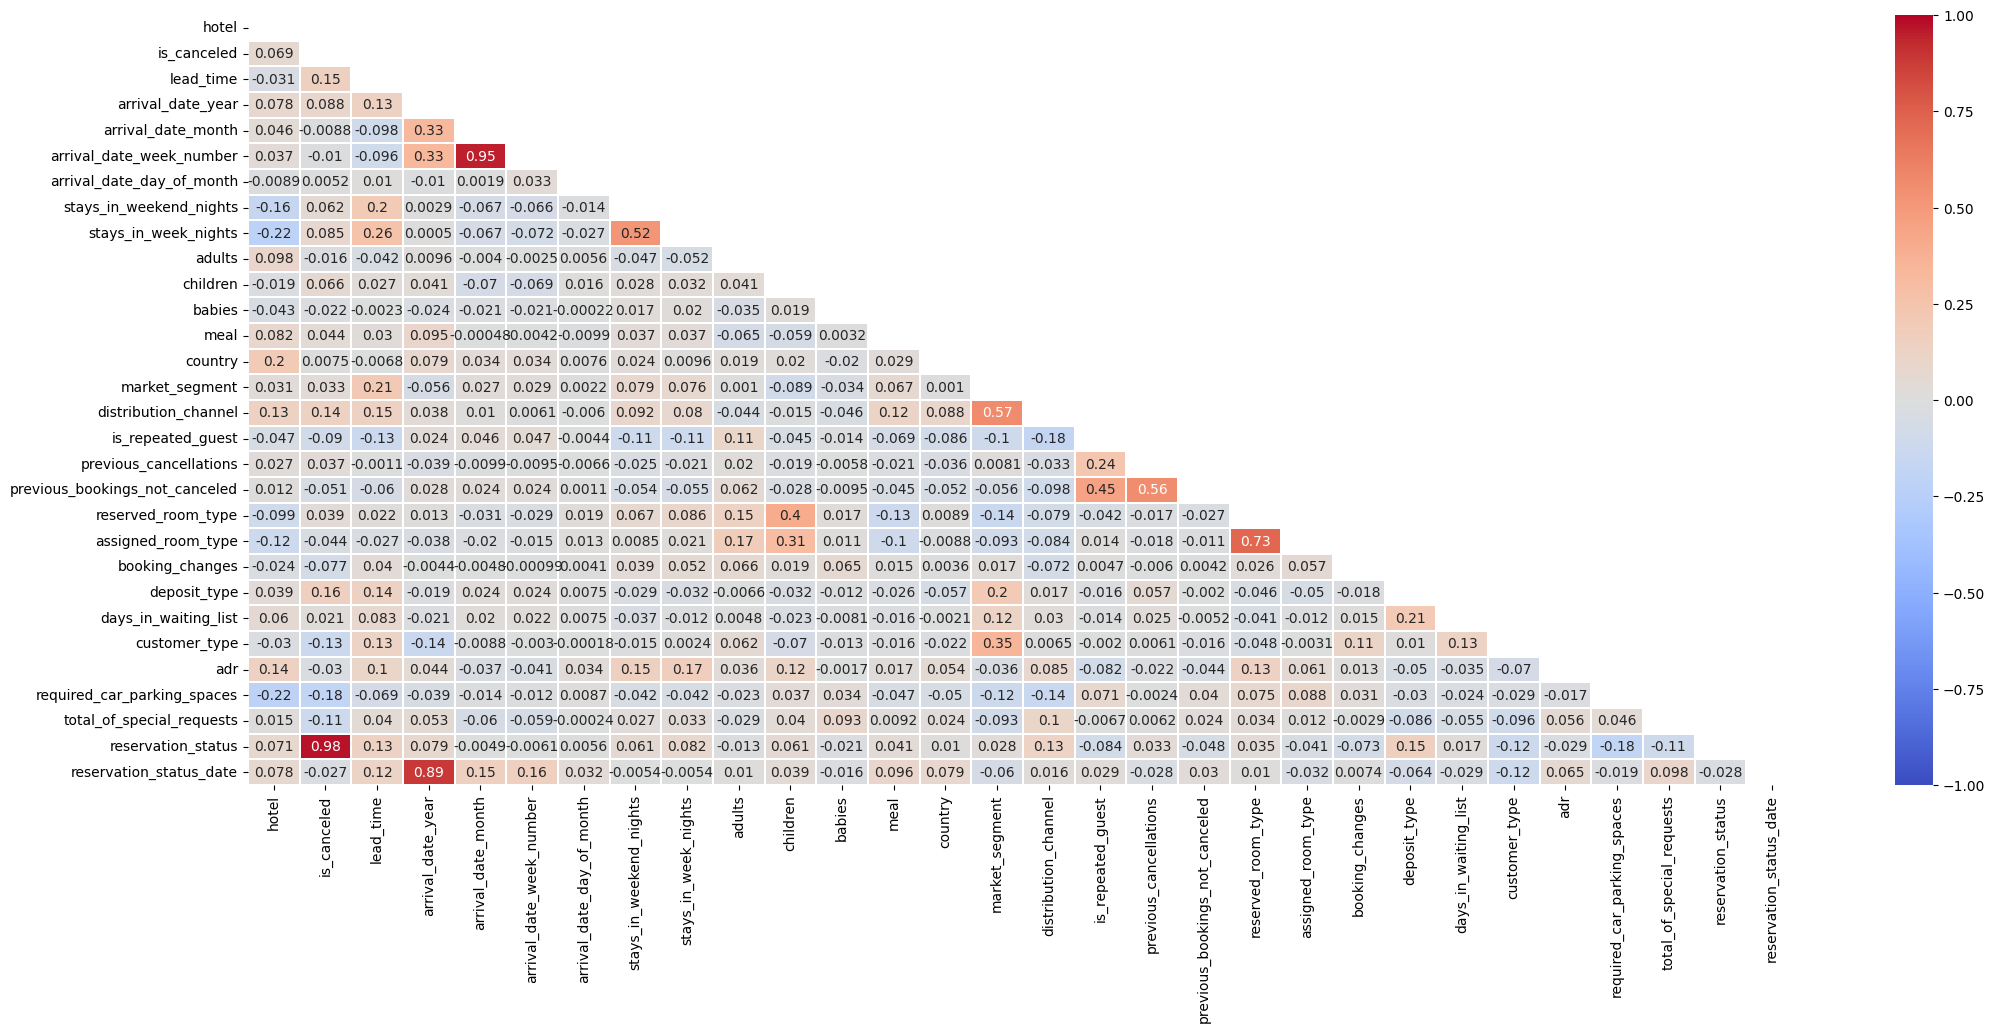

In [ ]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

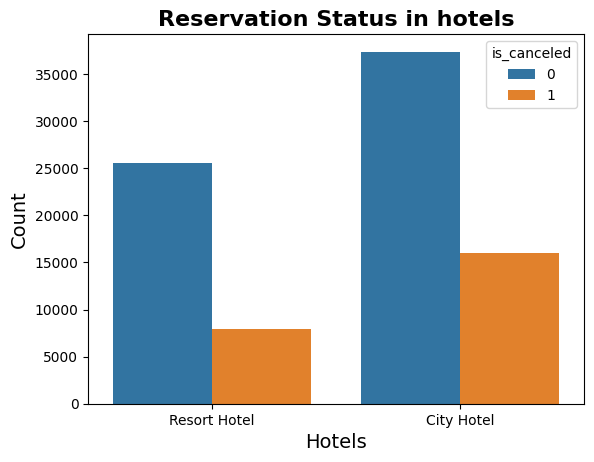

In [ ]:
rsvp_plot = sns.countplot(x='hotel', data=df, hue='is_canceled')

sns.set_style("whitegrid")

plt.title('Reservation Status in hotels', fontsize=16, fontweight='bold')
plt.xlabel('Hotels', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

<ipython-input-21-b9d003050d15>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='arrival_date_month', data=df, order=month, palette="viridis")


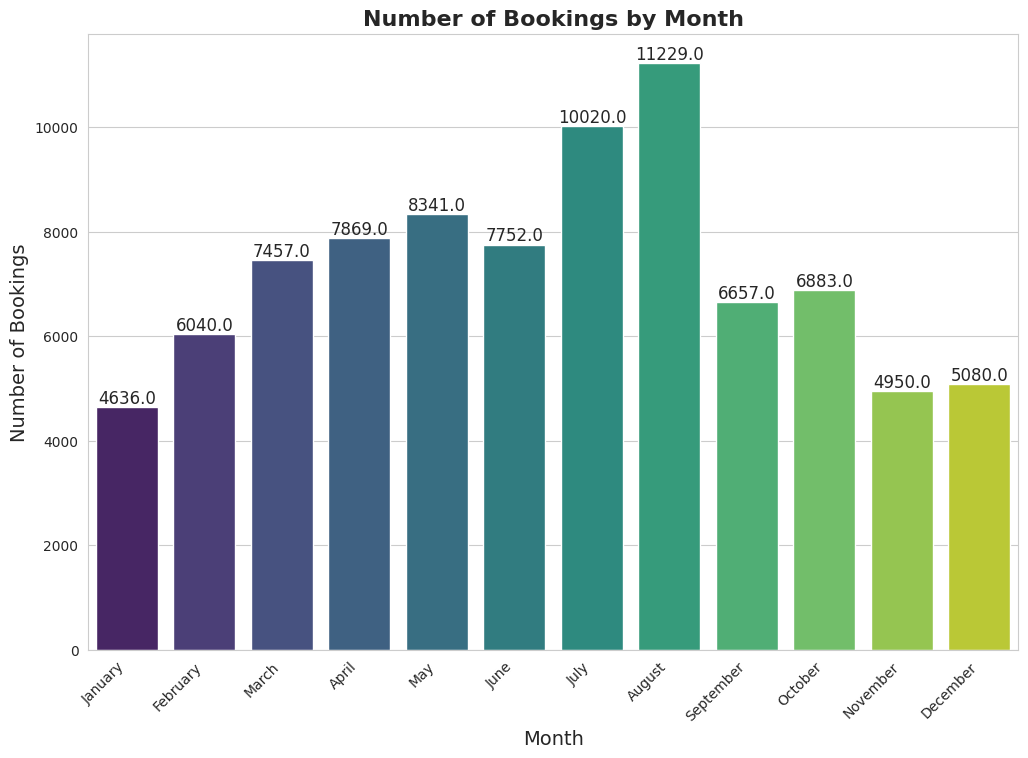

In [ ]:
import calendar

month = [calendar.month_name[i] for i in range(1, 13)]

sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.countplot(x='arrival_date_month', data=df, order=month, palette="viridis")
plt.title('Number of Bookings by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, ha='right')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=12)

plt.show()

In [ ]:
def convert_month_to_number(month_name):
    month_map = {
        "January": 1,
        "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12,
    }
    return month_map[month_name]

df['arrival_date_month_number'] = df['arrival_date_month'].map(convert_month_to_number)
df['arrival_date'] = df['arrival_date_year'].map(str) + '-' + df['arrival_date_month_number'].map(str) + '-' + df['arrival_date_day_of_month'].map(str)

df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86914 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86914 non-null  object        
 1   is_canceled                     86914 non-null  int64         
 2   lead_time                       86914 non-null  int64         
 3   arrival_date_year               86914 non-null  int64         
 4   arrival_date_month              86914 non-null  object        
 5   arrival_date_week_number        86914 non-null  int64         
 6   arrival_date_day_of_month       86914 non-null  int64         
 7   stays_in_weekend_nights         86914 non-null  int64         
 8   stays_in_week_nights            86914 non-null  int64         
 9   adults                          86914 non-null  int64         
 10  children                        86914 non-null  float64       
 11  babies

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_number,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,7,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,7,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,7,2015-07-01


In [ ]:
columns_reorder = [
    'hotel', 'arrival_date', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'lead_time', 'stays_in_weekend_nights',
    'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
    'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status_date', 'is_canceled'
]

df = df[columns_reorder]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86914 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           86914 non-null  object        
 1   arrival_date                    86914 non-null  datetime64[ns]
 2   arrival_date_year               86914 non-null  int64         
 3   arrival_date_month              86914 non-null  object        
 4   arrival_date_week_number        86914 non-null  int64         
 5   arrival_date_day_of_month       86914 non-null  int64         
 6   lead_time                       86914 non-null  int64         
 7   stays_in_weekend_nights         86914 non-null  int64         
 8   stays_in_week_nights            86914 non-null  int64         
 9   adults                          86914 non-null  int64         
 10  children                        86914 non-null  float64       
 11  babies

In [ ]:
df.to_csv('airbnb_preprocessed_dataset.csv', index=False)

# uploading the pre-processed dataset to bucket
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob('airbnb_preprocessed_dataset.csv')
blob.upload_from_filename('airbnb_preprocessed_dataset.csv')